importing libraries

In [536]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

specifying Times New Roman font and to force that within plotting commands

In [537]:
tnr = "Times New Roman"
plt.rcParams['font.sans-serif'] = tnr
plt.rcParams['font.family'] = tnr
params ={'mathtext.default':'regular'}          
plt.rcParams.update(params)

uploading files with data to be plotted

In [549]:
data = np.genfromtxt('parameters.txt')
old_data = np.genfromtxt('640_parameters.txt')
opacity_data = np.genfromtxt('kappaZ.txt')[2000:]
ObsID = 640

defining variables for plotting

In [550]:
wavelength = data[1:len(data), 0]

T_star = data[1:len(data), 1:2]
T_lower_error = data[1:len(data), 2:3]
T_upper_error = data[1:len(data), 3:4]
T_error = np.array([T_lower_error, T_upper_error])

R_o = data[1:len(data), 4:5]
R_lower_error = data[1:len(data), 5:6]
R_upper_error = data[1:len(data), 6:7]
R_error = np.array([R_lower_error, R_upper_error])

old_norm = old_data[1:len(data), 7:8]
norm = []
norm_lower_error = []
norm_upper_error = []
for j in range (0, len(data)):
    for i in range (0, len(old_data)):
        if data[j, 0] == old_data[i, 0]:
            norm.append(data[j, 7]/old_data[i, 7])
            norm_lower_error.append(data[j, 8]/old_data[i, 7])
            norm_upper_error.append(data[j, 9]/old_data[i, 7])
norm = np.asarray(norm)
norm_lower_error = np.asarray(norm_lower_error)
norm_upper_error = np.asarray(norm_upper_error)
norm_error = np.array([norm_lower_error, norm_upper_error])

finding taustar model to minimize chisquare, fitting mass loss rate by wavelength-dependent opacity

In [551]:
photon_energy = opacity_data[0:len(opacity_data), 0] # in keV
opacity_wavelength = 12.408/photon_energy # 12.408 = h*c*(10^{10})/(1.602*10^{-16})
opacity = opacity_data[0:len(opacity_data), 1] # in cm^2/g

T_model_param = r'$\tau_{\star}$'


finding horizontal Ro model to minimize chisquare

In [553]:
R_model_param = r'$R_o$'
interval_num = 1000
a = np.linspace(np.min(R_o-R_lower_error), np.max(R_o+R_upper_error), interval_num)
chi_square = []
for i in (a):
    deviation = 0
    for j in range(0, len(R_o)):
        if R_o[j] >= i:
            error_bar = R_lower_error[j]
        if R_o[j] <= i:
            error_bar = R_upper_error[j]
        if R_o[j] == i:
            error_bar = (R_lower_error[j]+R_upper_error[j])/2
        deviation = ((R_o[j]-i)/error_bar)**2+deviation
    chi_square.append(deviation)
R_model_param_value = a[chi_square.index(np.min(chi_square))]
R_model = np.repeat(R_model_param_value, len(R_o))
R_reduced_chi_square = np.min(chi_square)/(len(R_o)-1)
R_delta_chi_square_1 = a[(np.abs((R_reduced_chi_square+1)*(len(R_o)-1)-chi_square)).argmin()]
R_delta_chi_square_1_model = np.repeat(R_delta_chi_square_1, len(R_o))
R_delta_chi_square_2 = a[(np.abs((R_reduced_chi_square+1)*(len(R_o)-1)-np.where(chi_square == chi_square[(np.abs((R_reduced_chi_square+1)*(len(R_o)-1)-chi_square)).argmin()], -1., chi_square))).argmin()]
R_delta_chi_square_2_model = np.repeat(R_delta_chi_square_2, len(R_o))

finding horizontal norm model to minimize chisquare

In [524]:
norm_model_param = 'norm'
interval_num = 10
a = np.linspace(np.min(norm), np.max(norm), interval_num)
chi_square = []
for i in (a):
    deviation = 0
    for j in range(0, len(norm)):
        if norm[j] >= i:
            error_bar = norm_lower_error[j]
        if norm[j] <= i:
            error_bar = norm_upper_error[j]
        if norm[j] == i:
            error_bar = (norm_lower_error[j]+norm_upper_error[j])/2
        deviation = ((norm[j]-i)/error_bar)**2+deviation
    chi_square.append(deviation)
norm_model_param_value = a[chi_square.index(np.min(chi_square))]
norm_model = np.repeat(norm_model_param_value, len(norm))
norm_reduced_chi_square = np.min(chi_square)/(len(norm)-1)
norm_delta_chi_square_1 = a[(np.abs((norm_reduced_chi_square+1)*(len(norm)-1)-chi_square)).argmin()]
norm_delta_chi_square_1_model = np.repeat(norm_delta_chi_square_1, len(norm))
norm_delta_chi_square_2 = a[(np.abs((norm_reduced_chi_square+1)*(len(norm)-1)-np.where(chi_square == chi_square[(np.abs((norm_reduced_chi_square+1)*(len(norm)-1)-chi_square)).argmin()], -1., chi_square))).argmin()]
norm_delta_chi_square_2_model = np.repeat(norm_delta_chi_square_2, len(norm))

choosing parameter vs wavelength

In [525]:
# if plotting taustar vs wavelength, param = 0
# if plotting Ro vs wavelength, param = 1
# if plotting norm vs wavelength, param = 2
param = 2

linking plotted y variable to specific parameter

In [532]:
if param == 0:
    y = T_star
    y_error = T_error
    y_upper_error = T_upper_error
    y_lower_error = T_lower_error
    param_name = r'$\tau_{\star}$'
    param_tp = 'taustar'

if param == 1:
    y = R_o
    y_error = R_error
    y_upper_error = R_upper_error
    y_lower_error = R_lower_error
    param_name = r'$R_o$'
    param_tp = 'Ro'
    model = R_model
    model_param = R_model_param
    model_param_value = R_model_param_value
    reduced_chi_square = R_reduced_chi_square
    delta_chi_square_1 = R_delta_chi_square_1
    delta_chi_square_1_model = R_delta_chi_square_1_model
    delta_chi_square_2 = R_delta_chi_square_2
    delta_chi_square_2_model = R_delta_chi_square_2_model
    
if param == 2:
    y = 'norm'
    y_error = norm_error
    y_upper_error = norm_upper_error
    y_lower_error = norm_lower_error
    param_name = 'norm'
    param_tp = 'norm'
    model = norm_model
    model_param = norm_model_param
    model_param_value = norm_model_param_value
    reduced_chi_square = norm_reduced_chi_square
    delta_chi_square_1 = norm_delta_chi_square_1
    delta_chi_square_1_model = norm_delta_chi_square_1_model
    delta_chi_square_2 = norm_delta_chi_square_2
    delta_chi_square_2_model = norm_delta_chi_square_2_model 

plotting

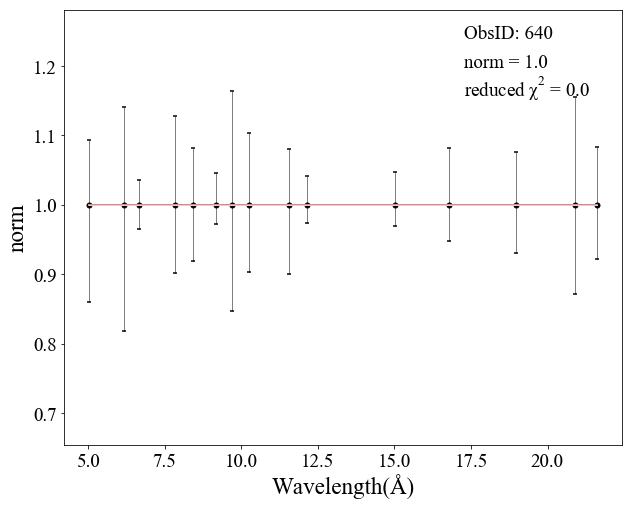

In [527]:
# determining plot size and labeling the plot

plt.figure(figsize = (10, 8))

plt.xlabel('Wavelength(Å)', fontsize = 23)
plt.ylabel(param_name, fontsize = 23)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)

plt.ylim(bottom = (np.min(y-y_lower_error))*0.8, top = (np.max(y+y_upper_error))*1.1)

plt.figtext(0.68,0.83, 'ObsID: '+str(ObsID), fontname=tnr, fontsize=19)


# plotting data points and their error bars

plt.plot(wavelength, y, 'o', color = 'black', markersize = 5)
plt.errorbar(wavelength, y, yerr = y_error, ls = 'none', color = 'black', linewidth = 0.5,capsize = 2.,capthick = 1.5)


# plotting and noting parameters of the model
plt.plot(wavelength, model, color = 'lightcoral', linestyle='-', linewidth=2.0)
plt.plot(wavelength, delta_chi_square_1_model, color = 'lightgrey', linestyle='-', linewidth=1.0)
plt.plot(wavelength, delta_chi_square_2_model, color = 'lightgrey', linestyle='-', linewidth=1.0)
plt.fill_between(wavelength, delta_chi_square_1_model, delta_chi_square_2_model, color='whitesmoke')

plt.figtext(0.68,0.78, model_param+' = '+str(np.around(model_param_value, 3)), fontsize=19)
plt.figtext(0.68,0.73, r'reduced $\chi^2$ = '+str(np.around(reduced_chi_square, 3)), fontsize=19)

plt.savefig(param_tp+'_vs_wavelength.png')
plt.show()